# Project: Investigate TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,cast,release year.
Brief Description of each column in the dataset

> **1.id** - Unique id's for each row

> **2.imdb_id** - System generated unique id

> **3.popularity** - popularity score

> **4.budget** - budget in dollars

> **5.revenue** - revenue in dollars

> **6.original_title** - Movie title

> **7.cast** - cast performed in movie

> **8.homepage** - website link of movie

> **9.director** - director name

> **10.tagline** - tagline of movie

> **11.keywords** - words used to give significant idea

> **12.overview** - general review of movie

> **13.runtime** - movie duration in seconds

> **14.genres** - categories of movie

> **15.production_companies** - company name which manages a movie process from start to finish

> **16.release_date** - movie releasing date

> **17.vote_count** - votes given by viewers

> **18.vote_average** - average votes given by viewers

> **19.release_year** - movie releasing year

> **20.budget_adj** - budget in 2010 dollars,accounting for inflation

> **21.revenue_adj** - revenue in 2010 dollars,accounting for inflation

**Questions that I planned on exploring over the course of the report**

1. Which year has the highest movie releases

2. Which month marks the highest number of releases

3. Most frequent runtime of movies

4. Which movies earned the highest and lowest profit

5. Which movies earned the highest and lowest revenue

6. Which movies were made with highest and lowest budget

7. Which year sees the maximum profit earned by all the movies released in that particular year

8. What kind of movie genres are made the most?

9. Most frequent keywords used

10. Which actor appeared in maxmimum number of films

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
tmdb_movies = pd.read_csv('tmdb-movies.csv')
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmdb_movies.shape

(10866, 21)

<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. .

In [4]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**We see that `release_date` is of type object, hence converting it to datetime and extracting out year, month amd day in separate colums**

In [5]:
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
tmdb_movies['release_year'] = tmdb_movies['release_date'].dt.year
tmdb_movies['release_month'] = tmdb_movies['release_date'].dt.month
tmdb_movies['release_day'] = tmdb_movies['release_date'].dt.weekday_name

In [6]:
tmdb_movies.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
release_month                    int64
release_day                     object
dtype: object

**Converting `release_month` from numerical months to month with names**

In [7]:
tmdb_movies['release_month'] = tmdb_movies['release_date'].dt.strftime('%B')

In [8]:
tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,Tuesday
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,Wednesday
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March,Wednesday
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December,Tuesday
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April,Wednesday


**Dropping columns which play the least significant role in our dataset**

In [9]:
tmdb_movies.drop(['imdb_id','homepage','tagline','release_date'],axis =1,inplace =True)

**Checking if our dataset contains duplicates and if it has, then removing them**

In [10]:
sum(tmdb_movies.duplicated())

1

In [11]:
tmdb_movies.drop_duplicates(keep= 'first',inplace = True)

**Checking how many null values are there in each column of our dataset**

In [12]:
tmdb_movies.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
release_day                0
dtype: int64

In [13]:
tmdb_movies.shape

(10865, 19)

**We see that `keywords` and `production_companies` has maximum number of null values, hence dropping all the null values for proper analysis**

In [14]:
tmdb_movies.dropna(inplace = True)

In [15]:
tmdb_movies.shape

(8666, 19)

**Our dataset reduced from 10,865 entries to 8666 entries after removing all the null values from our dataset**

**Now checking for the movies who earned zero revenue in the rest 8666 movies**

In [16]:
tmdb_movies[tmdb_movies['revenue'] == 0]

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,481,5.3,2015,2.759999e+07,0.0,January,Wednesday
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,280,5.4,2015,1.839999e+07,0.0,May,Thursday
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015,0.000000e+00,0.0,June,Wednesday
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,569,7.7,2015,0.000000e+00,0.0,June,Friday
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,11,5.4,2015,0.000000e+00,0.0,December,Saturday
93,307663,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,artificial intelligence|android|self-awareness...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,181,4.1,2015,9.199996e+06,0.0,January,Friday
100,326359,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,sister sister relationship|birthday|song|birth...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,475,7.0,2015,0.000000e+00,0.0,March,Monday
101,254302,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,skyscraper|high rise,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,161,5.4,2015,0.000000e+00,0.0,September,Saturday
103,292040,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,Bharat Nalluri,corruption|terrorist|explosive|police|kidnapping,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,114,5.6,2015,0.000000e+00,0.0,April,Saturday
116,297291,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,magic|fantasy|steampunk|dragon,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,22,4.5,2015,0.000000e+00,0.0,January,Friday


#### The above step signifies that there are 4130 movies which earned zero revenue and dropping these many rows will reduce our dataset greatly. After careful observation, we can see that some movies have zero runtime. Let's check the count of those movies and remove them

In [17]:
tmdb_movies[tmdb_movies['runtime'] == 0]

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,release_day
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,11,5.4,2015,0.000000e+00,0.0,December,Saturday
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",80,6.5,2015,0.000000e+00,0.0,November,Monday
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,woman director,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,11,5.4,2015,0.000000e+00,0.0,April,Sunday
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,kidnapping|brutality|violence|teenager|discovery,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,16,3.4,2014,2.993546e+06,0.0,October,Monday
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,brazilian|biography|music|drama|documentary,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,14,6.0,2014,0.000000e+00,0.0,October,Thursday
5920,248842,0.165765,0,0,The Food Guide to Love,Richard Coyle|Leonor Watling|GinÃ©s GarcÃ­a Mi...,Dominic Harari|Teresa Pelegri,woman director,A dysfunctional love story about an Irish food...,0,Romance|Comedy,Haut et Court|Parallel Film Productions|Fox In...,12,5.6,2013,0.000000e+00,0.0,December,Wednesday
5938,191562,0.147188,0,0,Go Goa Gone,Saif Ali Khan|Anand Tiwari|Vir Das|Pooja Gupta,Krishna D.K.|Raj Nidimoru,hindi|zombies island|zombies|zombie survival,"A rave party off the coast of Goa, goes horrif...",0,Comedy|Horror,Eros International,16,5.3,2013,0.000000e+00,0.0,May,Friday


### There are 7 entries having zero runtime and we can see that these movies have zero revenue also. Hence, removing these entries

In [18]:
indexes_to_be_removed = tmdb_movies[tmdb_movies['runtime'] == 0].index
indexes_to_be_removed

Int64Index([92, 334, 486, 1289, 1293, 5920, 5938], dtype='int64')

In [19]:
tmdb_movies.drop(indexes_to_be_removed, inplace=True)
tmdb_movies.shape

(8659, 19)

In [20]:
tmdb_movies['release_year'].describe()

count    8659.000000
mean     2003.975748
std        16.477558
min      1970.000000
25%      1995.000000
50%      2005.000000
75%      2011.000000
max      2069.000000
Name: release_year, dtype: float64

### We can see that the maximum release_year is 2069 which is inappropriate, hence taking only those movies whose year is less than 2020

In [21]:
tmdb_movies = tmdb_movies[tmdb_movies['release_year'] <= 2020]
tmdb_movies.shape

(8325, 19)

**Our dataset now has 8325 movie entries and now we can proceed with Exploratory Data Analysis**

<a id='eda'></a>
## Exploratory Data Analysis


In [22]:
matplotlib.style.use('seaborn')

### Question 1. Which year has the highest movie releases

In [23]:
year_plot = tmdb_movies['release_year'].value_counts().head(10)
year_plot

2014    518
2013    454
2015    437
2009    413
2012    387
2011    383
2008    380
2007    347
2010    343
2006    325
Name: release_year, dtype: int64

[Text(0, 0.5, 'Count of movies'), Text(0.5, 0, 'Year')]

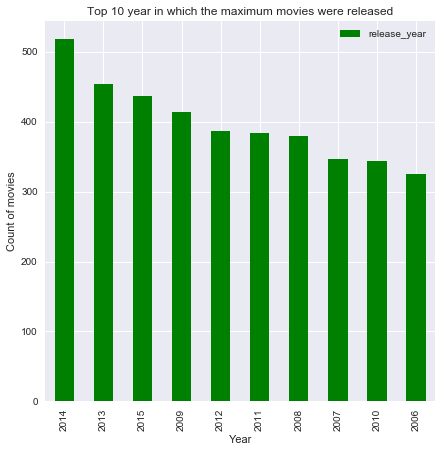

In [24]:
ax = year_plot.plot(kind='bar',
            title='Top 10 year in which the maximum movies were released',
            legend=True,
            color='green',
            figsize=(7,7))
ax.set(xlabel='Year',ylabel='Count of movies')

> **From the plot, we can see that 2014 marks the year which highest number of releases i.e. 518 followed by 2013 having 454 releases followed by 2015 having 437 movie releases**

### Question 2: Which month marks the highest number of releases

In [25]:
month_plot = tmdb_movies['release_month'].value_counts()
month_plot

September    1037
October       864
December      753
August        719
June          643
May           642
March         635
January       634
November      628
July          624
April         609
February      537
Name: release_month, dtype: int64

[Text(0, 0.5, 'Count of movies'), Text(0.5, 0, 'Month')]

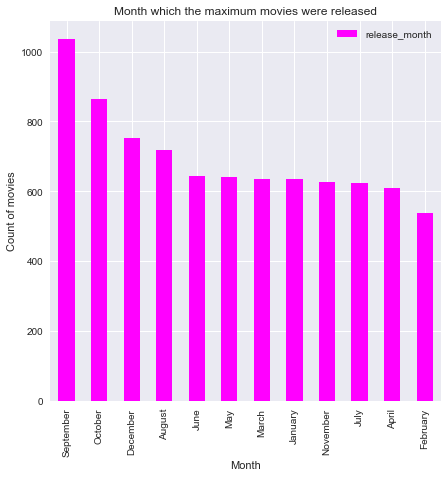

In [26]:
ax = month_plot.plot(kind='bar',
            title='Month which the maximum movies were released',
            legend=True,
            color='magenta',
            figsize=(7,7))
ax.set(xlabel='Month',ylabel='Count of movies')

> **From the plot, we can see that September marks the highest number of releases**

### Question 3: Most frequent runtime of movies

[Text(0, 0.5, 'No. of movies'), Text(0.5, 0, 'Runtime of Movies in Minutes')]

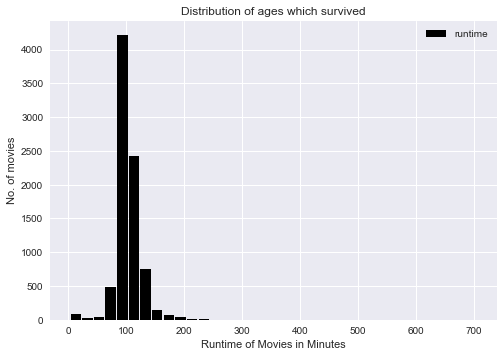

In [27]:
plot_runtime = tmdb_movies['runtime'].plot(kind='hist',
                                           title='Distribution of ages which survived',
                                           grid=True,
                                           legend=True,
                                           bins=35,
                                           rwidth = 0.9,
                                          color='black')
plot_runtime.set(xlabel='Runtime of Movies in Minutes',ylabel='No. of movies')

> **From the right skewed plot, we can see that the average running time of most of the movies lies near 100 minutes.**

In [28]:
tmdb_movies['runtime'].describe()

count    8325.000000
mean      103.492733
std        25.782503
min         3.000000
25%        91.000000
50%       100.000000
75%       113.000000
max       705.000000
Name: runtime, dtype: float64

**Above numbers show that most of movies has an average runtime of 103 minutes**

### Question 4: Which movies earned the highest and lowest profit

In [29]:
tmdb_movies['profit_earned'] = tmdb_movies['revenue'] - tmdb_movies['budget']
tmdb_movies['profit_earned'].head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit_earned, dtype: int64

In [30]:
def calculate_high(column):
    return tmdb_movies.loc[tmdb_movies[column].idxmax()]

def calculate_low(column):
    return tmdb_movies.loc[tmdb_movies[column].idxmin()]

In [31]:
calculate_high('profit_earned')

id                                                                  19995
popularity                                                        9.43277
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
keywords                culture clash|future|space war|space colony|so...
overview                In the 22nd century, a paraplegic Marine is di...
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
vote_count                                                           8458
vote_average                          

**`Avatar` earned the maximum profit**

In [32]:
calculate_low('profit_earned')

id                                                                  46528
popularity                                                        0.25054
budget                                                          425000000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
vote_count                                                             74
vote_average                          

**`The Warrior's Way` earned the least profit**

### Question 5: Which movies earned the highest and lowest revenue

In [33]:
calculate_high('revenue')['original_title']

'Avatar'

**`Avatar` earned the maximum revenue**

In [34]:
calculate_low('revenue')['original_title']

'Wild Card'

**`Wild Card` earned the least revenue**

### Question 6: Which movies were made with highest and lowest budget

In [35]:
calculate_high('budget')['original_title']

"The Warrior's Way"

**`The Warrior's Way` spent the maximum amount in making**

In [36]:
calculate_low('budget')['original_title']

'Mr. Holmes'

**`Mr. Holmes` spent the least amount of money in making the movie**

### Question 7: Which year sees the maximum profit earned by all the movies released in that particular year

[Text(0, 0.5, 'Profits earned rounded off to 10 billion'),
 Text(0.5, 0, 'Year')]

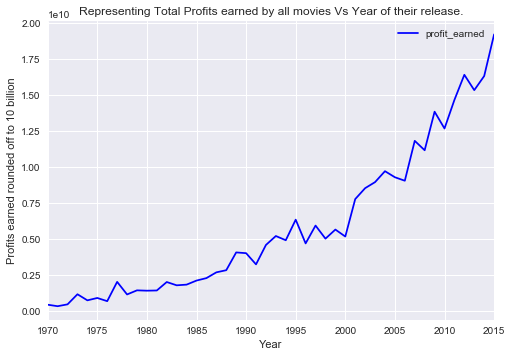

In [37]:
profits_year = tmdb_movies.groupby('release_year')['profit_earned'].sum()
plot_profits_year = profits_year.plot(kind='line',
                                     title='Representing Total Profits earned by all movies Vs Year of their release.',
                                     grid=True,
                                     legend=True,
                                     color='blue')
plot_profits_year.set(xlabel='Year',ylabel='Profits earned rounded off to 10 billion')

> **From the above plot, we can see that year 2015 earned the maximum profit**

### Question 8: What kind of movie genres are made the most?

In [38]:
def categories_count(column):
    
    data = tmdb_movies[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

In [39]:
categories_count('genres')

Drama              3773
Comedy             2946
Thriller           2399
Action             1948
Romance            1351
Horror             1293
Adventure          1207
Crime              1158
Science Fiction     998
Family              911
Fantasy             741
Mystery             672
Animation           500
Music               288
Documentary         266
History             258
War                 207
Western             118
TV Movie            112
Foreign              83
dtype: int64

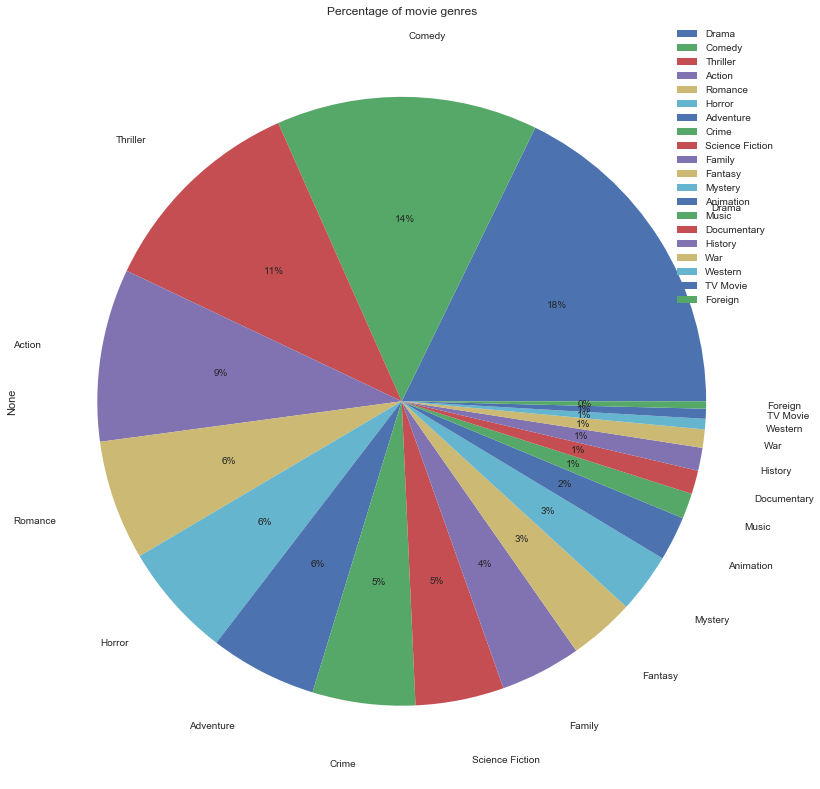

In [40]:
categories_count('genres').plot(kind='pie',
                                             legend=True,
                                             title='Percentage of movie genres',
                                             autopct='%1.0f%%', labeldistance=1.2,
                                             figsize=(14,14))

> **The above pie chart shows that `Drama` accounts for the maximum genres with 18% weightage followed by `Comedy` with 14%**

### Question 9: Most frequent keywords used

In [41]:
categories_count('keywords').head(10)

independent film        335
woman director          333
sex                     262
based on novel          255
sport                   196
murder                  187
new york                155
biography               154
nudity                  151
duringcreditsstinger    147
dtype: int64

[Text(0, 0.5, 'Count of keywords appearing in the dataset'),
 Text(0.5, 0, 'Top 10 keywords in descending order')]

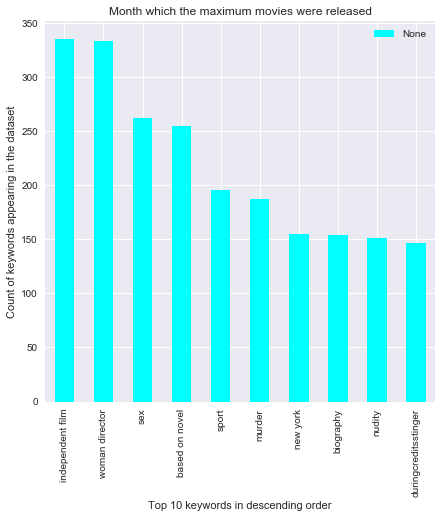

In [42]:
ax = categories_count('keywords').head(10).plot(kind='bar',
                                                title='Month which the maximum movies were released',
                                                legend=True,
                                                color='cyan',
                                                figsize=(7,7))
ax.set(xlabel='Top 10 keywords in descending order',ylabel='Count of keywords appearing in the dataset')

> **From the above bar chart, `independent film`, `woman director` and `sex` are the widely used keywords to describe movies**

### Question 10: Which actor appeared in maxmimum number of films

In [43]:
categories_count('cast').head(10)

Robert De Niro       68
Samuel L. Jackson    65
Bruce Willis         61
Nicolas Cage         59
Robin Williams       48
John Goodman         47
Morgan Freeman       47
John Cusack          46
Tom Hanks            46
Alec Baldwin         45
dtype: int64

[Text(0, 0.5, 'Name of the top 10 cast appearing maximum times in a dataset'),
 Text(0.5, 0, 'Number of movies in the database')]

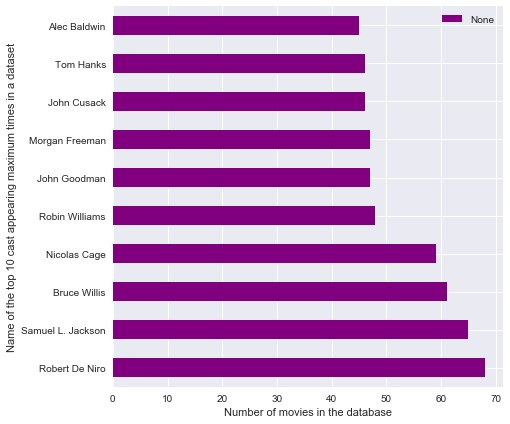

In [44]:
ax = categories_count('cast').head(10).plot(kind='barh',
                                           title='',
                                           legend=True,
                                           color='purple',
                                           figsize=(7,7))
ax.set(xlabel='Number of movies in the database',ylabel='Name of the top 10 cast appearing maximum times in a dataset')

> **From the horizontal bar graph, we can see that `Robert De Niro`, `Samuel L. Jackson` and `Bruce Wills` appeared in maximum number of movies i.e. 68, 65 and 61 respectively.**

<a id='conclusions'></a>
## Conclusions

+ **`2014` marks the year with highest number of releases i.e. 518 followed by `2013` having 454 releases followed by `2015` having 437 movie releases**

+ **Highest Number of releases occurs in the month of `September`**

+ **Average running time of the movies is 103 minutes**

+ **`Avatar` earned the highest profit and `The Warrior's Way` earned the least profit**

+ **`Avatar` had the highest revenue and `Wild Card` had the least revenue**

+ **`The Warrior's Way` had the maximum budget and `Mr. Holmes` had the least budget**

+ **Year `2015` had seen the maximum profit gained from the movies launched in that year**

+ **`Drama`, `Comedy`, `Thriller`, `Action` and `Romance` are the top 5 most popular genres**

+ **`independent film`, `woman director` and `sex` are the most widely used keywords to describe movies**

+ **`Robert De Niro`, `Samuel L. Jackson` and `Bruce Wills` appeared in maximum number of movies**

## Limitations

+ I have found the results of popular movies, popular cast and popular genres but the analysis could have been more informative if data also has details of awards received by actors or actress

+ The budget and revenue columns did not have a currency specified so there may be some differences due to fluctuating exchange rates. Different countries may also have different rules and regulations they have to follow which may restrict them from artistiic freedom.

+ Rows with NaN values were dropped, hence a lot of key data might have been lost in the process.

+ There are a lot of crew members apart from the director, cast and the production companies who help in creating a movie like writers, screenplay writers, editors, etc. but there was no data to analyse those aspects.